# BEE 4750 Homework 2: Systems Modeling and Simulation

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 09/19/24, 9:00pm

## Overview

### Instructions

-   Problem 1 asks you to derive a model for water quality in a river
    system and use this model to check for regulatory compliance.
-   Problem 2 asks you to explore the dynamics and equilibrium stability
    of the shallow lake model under a particular set of parameter
    values.
-   Problem 3 (5750 only) asks you to modify the lake eutrophication
    example from Lecture 04 to account for atmospheric deposition.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\nobel\OneDrive\桌面\BEE5750\hw\hw2-bt366\hw2-bt366`


In [2]:
using Plots
using LaTeXStrings
using CSV
using DataFrames
using Roots

## Problems (Total: 50/60 Points)

### Problem 1 (25 points)

A river which flows at 10 km/d is receiving discharges of wastewater
contaminated with CRUD from two sources which are 15 km apart, as shown
in the Figure below. CRUD decays exponentially in the river at a rate of
0.36 $\mathrm{d}^{-1}$.

<figure>
<img src="attachment:figures/river_diagram.png"
alt="Schematic of the river system in Problem 1" />
<figcaption aria-hidden="true">Schematic of the river system in Problem
1</figcaption>
</figure>

**In this problem**:

-   Assuming steady-state conditions, derive a model for the
    concentration of CRUD downriver by solving the appropriate
    differential equation(s) analytically.
-   Determine if the system in compliance with a regulatory limit of 2.5
    kg/(1000 $m^3$).

1. The concentration after the first discharge is $C_1$ concentration of river * volume of river + concentration of discharge * volume of discharge / volume, assuming the flow doesn't change, I'm adding the volume that get mixed in a day for each discharge point, which will be 250000+40000, and 250000+60000.
2. Between Discharge 1 and Discharge 2, the decay is exponentially, so I use e^(-0.36*days/10) for the decay, after C1 and C2
We can calculate that after Discharge 2, the concentration of the CRUD is 2.14/1000 $m^3$, which is under the regulation.

In [60]:
function concentration_at_X_distance(Discharge_1_C, Discharge_1_V, Discharge_2_C, Discharge_2_V, C_in, V_river, decay_rate, Distance)

    C_1 = (C_in * V_river + Discharge_1_C * Discharge_1_V) / (Discharge_1_V + V_river)

    C_2 = (C_1 * V_river * exp(decay_rate * Distance/10) + Discharge_2_C * Discharge_2_V) / (V_river + Discharge_2_V)
    
    return C_2
end

Discharge1C = 9
Discharge1V = 40
Discharge2C = 7
Discharge2V = 60
Initial_C = 0.5
River_in = 250
Distance = 15
Decay = -0.36

Concentration_C2 = concentration_at_X_distance(Discharge1C, Discharge1V, Discharge2C, Discharge2V, Initial_C, River_in, Decay, Distance)
@show Concentration_C2

Concentration_C2 = 2.140803399336443


2.140803399336443

> **Tip**
>
> Formulate your model in terms of distance downriver, rather than
> leaving it in terms of time from discharge.

### Problem 2 (25 points)

Consider the shallow lake model from class:

$$
\begin{aligned}
X_{t+1} &= X_t + a_t + y_t + \frac{X_t^q}{1 + X_t^q} - bX_t, \\
y_t &\sim \text{LogNormal}(\mu, \sigma^2),
\end{aligned}
$$

where:

-   $X_t$ is the lake phosphorous (P) concentration at time $t$;
-   $a_t$ is the point-source P release at time $t$;
-   $y_t$ is the non-point-source P release at time $t$, which is
    treated as random from a LogNormal distribution with mean $\mu$ and
    standard deviation $\sigma$;
-   $b$ is the linear rate of P outflow;
-   $q$ is a parameter influencing the rate of P recycling from the
    sediment.

**In this problem**:

-   Make an initial conditions plot for the model dynamics for $b=0.5$,
    $q=1.5$, $y_t=0$, and $a_t=0$ for $t=0, \ldots, 30$. What are the
    equilibria? What can you say about the resilience of the system?

    > **Finding equilibria**
    >
    > Use [`Roots.jl`](https://juliamath.github.io/Roots.jl/stable/) to
    > find the equilibria by solving for values where $X_{t+1} = X_t$.
    > For example, if you have functions `X_outflow(X,b)` and
    > `X_recycling(X,q)`, you could create a function
    > `X_delta(x, a) = a + X_recycling(x) - X_outflow(x)` and call
    > `Roots.find_zero(x -> X_delta(x, a), x₀)`, where `x₀` is an
    > initial value for the search (you might need to use your plot to
    > find values for `x₀` near each of the “true” equilibria).

-   Repeat the analysis with $a_t=0.02$ for all $t$. What are the new
    equilibria? How have the dynamics and resilience of the system
    changed?

For the initial plot:
1. define function of of yt(recycling) and P outflow with respective equation.
2. Set up the equation using the shallow lake model in the problem.
3. define each value and setup the time step with X_val
4. use the function and x val to determine the stable and unstable equalibria.

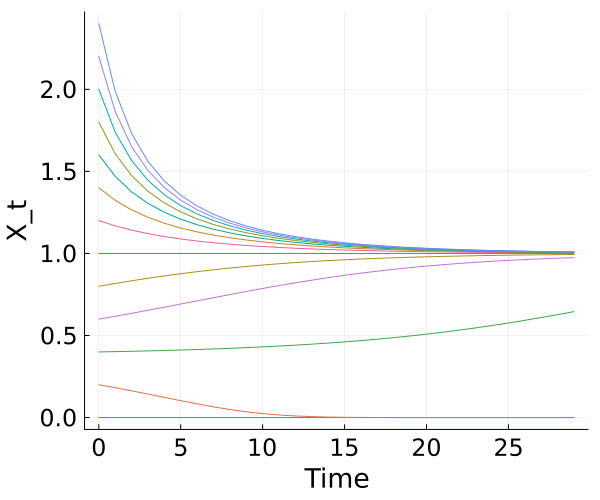

In [3]:
function lake_P_cycling(x, q)
    return x^q / (1 + x^q)
end

function lake_P_out(x, b)
    return b * x
end

function simulate_lake_P(X_ic, T, b, q, a, y)
    X = zeros(T)
    X[1] = X_ic
    for t = 2:T
        X[t] = X[t-1] .+ a[t] .+ y[t] .+ lake_P_cycling(X[t-1], q) .- lake_P_out(X[t-1], b)
    end
    return X
end


T = 30
b = 0.5
q = 1.5
a = zeros(T)
y = zeros(T)

X_vals = collect(0.0:0.2:2.5)

X = [simulate_lake_P(X_ic, T, b, q, a, y) for X_ic in X_vals]
plot(0:T-1, X, label=false, xlabel="Time", guidefontsize=18, tickfontsize=16, size=(600, 500), ylabel="X_t")

1. From the graph, we can see that the equalibrium should be at around 1.0.
2. From the hint, I'm going to use the root to find the equilibrium using the x_delta function a + cycling-outflow = equilibrium.
3. We can find both the initial equilibrium = 0, and at a = 0.02, the equilibrium will be around 1.134

In [17]:
# Define the cycling and outflow functions
function lake_P_cycling(x, q)
    return x^q / (1 + x^q)
end

function lake_P_out(x, b)
    return b * x
end

# Define the delta function that represents the equilibrium condition
function X_delta(x, a, b, q)
    return a + lake_P_cycling(x, q) - lake_P_out(x, b)
end

b = 0.5
q = 1.5
a = 0.0  

X_initial_equilibrium = 1.0 
Eq = find_zero(x -> X_delta(x, a, b, q), X_initial_equilibrium)
println("Equilibrium: ", Eq)

Equilibrium: 1.0


In [18]:
a = 0.02
X_eq_with_input = find_zero(x -> X_delta(x, a, b, q), X_initial_equilibrium)
println("At a_t = 0.02, the equilibrium: ", X_eq_with_input)

At a_t = 0.02, the equilibrium: 1.1341008852434813


### Problem 3 (10 points)

**This problem is only required for students in BEE 5750**.

Consider the lake eutrophication example from [Lecture
04](https://viveks.me/environmental-systems-analysis/slides/lecture03-1-eutrophication-modeling.html#/title-slide).
Suppose that phosphorous is also atmospherically deposited onto the lake
surface at a rate of
$1.6 \times 10^{-4} \mathrm{kg/(yr} \cdot \mathrm{m}^2)$, which is then
instantly mixed into the lake. Derive a model for the lake phosphorous
concentration and find the maximum allowable point source phosphorous
loading if the goal is to keep lake concentrations below 0.02 mg/L.

1. using the model from lecture 4, we can get that point source + non point source <= concentration in kg/m3 * (Qout + 10A). 
2. However, we have to include atmosphere phosphorous this time, which is $1.6*10^-4 kg/(yr*m^2)$, so after subscrating the total atmosphere disposit from the equation, we can get the total point_source left.

3. After plugging in the numbers from Lecture 4, we can get that the max point source loading is going to be 9200kg/yr

In [49]:
function max_phosphorus_loading(A, atm_rate, max_concentration, outflow_rate, V, D)
    max_concentration_kg = max_concentration / 1000.0
    atm_deposition = atm_rate * A
    decay_rate = D * A / V #decay rate from Vollenweider model for P sedimentation
    point_source = max_concentration_kg * (outflow_rate + decay_rate * V) - atm_deposition
    return point_source
end

lake_area = 30e6

lake_volume = 600e6

dep_rate = 1.6e-4

max_concentration = 0.02

outflow_rate = 400e6

decay = 10

max_point_source_loading= max_phosphorus_loading(lake_area, dep_rate, max_concentration, outflow_rate, lake_volume, decay)
@show max_point_source_loading


max_point_source_loading = 9200.000000000002


9200.000000000002

## References

List any external references consulted, including classmates.